## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample,shuffle
from scipy import stats
import pickle
from collections import Counter
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

# Load dataset and print dataframe

## Load dataset

In [2]:
df=pd.read_csv("/kaggle/input/wine-quality-binary-classification/wine.csv")

## Display dataframe

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


## Get features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


## Separate features and classification label

In [5]:
X=df.iloc[:,:-1] # Features
Y=df.iloc[:,-1] # Labels

## Labels

In [6]:
classes = ['good','bad']

## Checking dataset balance

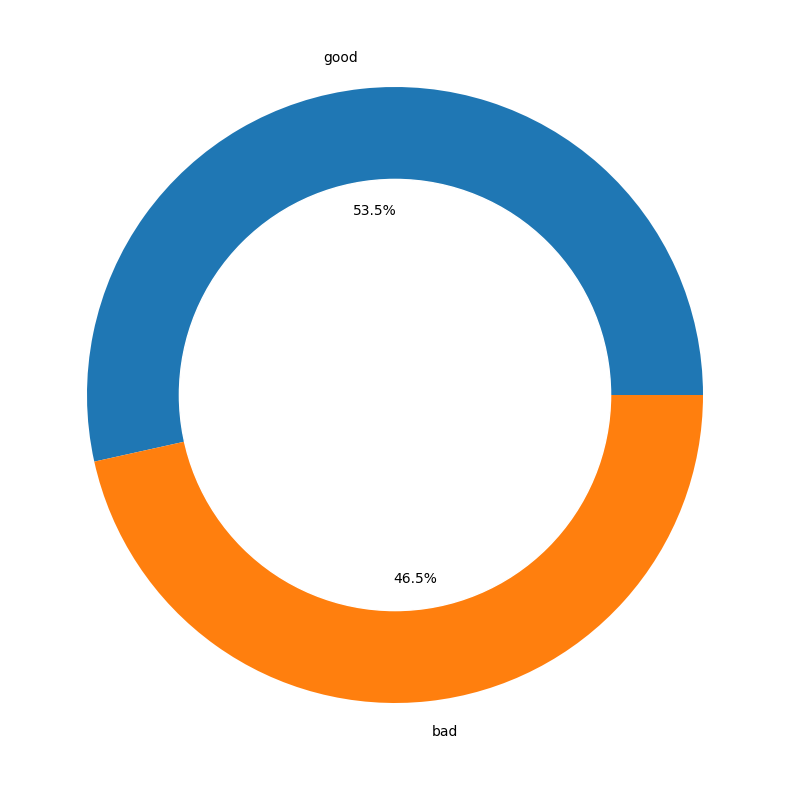

In [7]:
## Data repartition per class
per_class = df.iloc[:,-1].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels= classes, colors=['tab:blue','tab:orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Data preprocessing

## Train and test dataset split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Model training

### Random Forest

#### Initialize model

In [9]:
rf = RandomForestClassifier(class_weight='balanced')

#### Train and evaluate model

In [10]:
y_pred = rf.fit(X_train, y_train).predict(X_test)
with open('random_forest.pkl','wb') as f:
    pickle.dump(rf,f)
    acc=accuracy_score(y_test,y_pred)
    print("Accuracy : {} ".format(acc))
    f1 = f1_score(y_pred, y_test, average="weighted")
    print("F1 Score : {} ".format(f1))

Accuracy : 0.80625 
F1 Score : 0.8064037698412699 


#### Confusion matrix

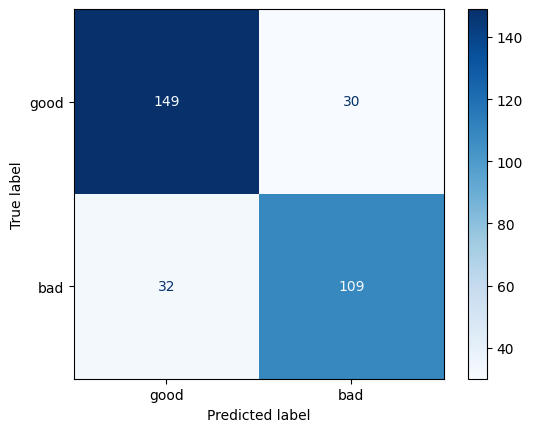

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

#### Classification report

In [12]:
df_class = pd.DataFrame(classification_report(y_pred, y_test, digits=2,output_dict=True)).T
df_class['support'] = df_class.support.apply(int)
df_class.rename(index={'0':'good', '1':'bad'}, inplace=True)
df_= df_class
df_.style.background_gradient(cmap='viridis')

,precision,recall,f1-score,support
bad,0.773050,0.784173,0.778571,139
good,0.832402,0.823204,0.827778,181
accuracy,0.806250,0.806250,0.806250,0
macro avg,0.802726,0.803689,0.803175,320
weighted avg,0.806621,0.806250,0.806404,320


## Naise bayes

#### Initialize model

In [13]:
gnb = CategoricalNB()

#### Train and evaluate model

In [14]:
y_pred = rf.fit(X_train, y_train).predict(X_test)
with open('gnb.pkl','wb') as f:
    pickle.dump(gnb,f)
    acc=accuracy_score(y_test,y_pred)
    print("Accuracy : {} ".format(acc))
    f1 = f1_score(y_pred, y_test, average="weighted")
    print("F1 Score : {} ".format(f1))

Accuracy : 0.784375 
F1 Score : 0.7848360533460632 


#### Confusion matrix

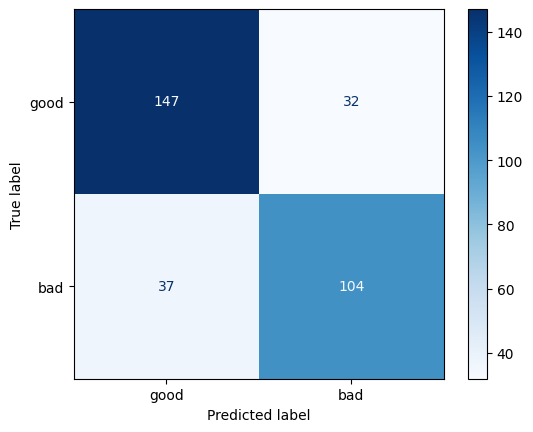

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

#### Classification report

In [16]:
df_class = pd.DataFrame(classification_report(y_pred, y_test, digits=2,output_dict=True)).T
df_class['support'] = df_class.support.apply(int)
df_class.rename(index={'0':'good', '1':'bad'}, inplace=True)
df_= df_class
df_.style.background_gradient(cmap='viridis')

,precision,recall,f1-score,support
bad,0.737589,0.764706,0.750903,136
good,0.821229,0.798913,0.809917,184
accuracy,0.784375,0.784375,0.784375,0
macro avg,0.779409,0.781809,0.780410,320
weighted avg,0.785682,0.784375,0.784836,320
